In [25]:
import os
import numpy as np
import pandas as pd
import json
os.environ["NAMESPACE"]="research"
os.environ["PROFILE"]="local"
from agrobrain_util.runtime.evironment import RuntimeEnv
from agrobrain_util.infra.app_config import application_config as cfg

import shutil
import glob
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
import random
import glob
import datetime
from tqdm import tqdm
from datetime import datetime

from PIL import Image

import dtlpy as dl
if dl.token_expired():
    dl.login()

env = RuntimeEnv()
categories_dict = cfg['tags']['categories']

DATA_DIR = "data"

In [ ]:
def add_box(item):
    builder = item.annotations.builder()
    builder.add(
        annotation_definition=dl.Box(
            top=100, left=100, bottom=400, right=400, label="annotation box"
        )
    )
    item.annotations.upload(annotations=builder)


PROJEC_NAME = 'Taranis AI Annotation Projects'
TASK_NAME = 'anafa_2023_06_07_wide_full_filtered'
DATASET_NAME = "anafa_2023_06_23_resolution_lim_dataset"
VERSION = 0

project = dl.projects.get(project_name=PROJEC_NAME)
task = project.tasks.get(task_name=TASK_NAME)
dataset = project.datasets.get(dataset_id=DATASET_NAME)


# item = dataset.items.get (item_id = 'my_item_Id')
# annotation_builder = item.annotations.builder()
# annotation_builder.save()

/usr/local/lib/python3.8/dist-packages/skimage/io/_plugins/imageio_plugin.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  return np.asarray(imageio_imread(*args, **kwargs))


TypeError: 'NoneType' object is not subscriptable

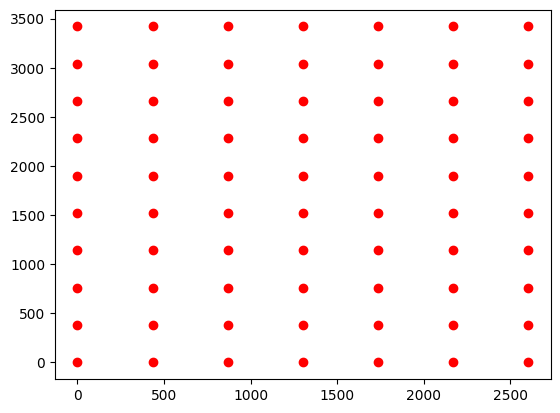

In [6]:
import os
import numpy as np
import pandas as pd
import json
os.environ["NAMESPACE"]="research"
os.environ["PROFILE"]="local"
from agrobrain_util.runtime.evironment import RuntimeEnv
from agrobrain_util.infra.app_config import application_config as cfg

import shutil
import glob
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
import random
import glob
import datetime
from tqdm import tqdm
from datetime import datetime

from PIL import Image

import dtlpy as dl
if dl.token_expired():
    dl.login()

env = RuntimeEnv()
categories_dict = cfg['tags']['categories']

DATA_DIR = "data"

def add_box(item):
    builder = item.annotations.builder()
    builder.add(
        annotation_definition=dl.Box(
            top=100, left=100, bottom=400, right=400, label="annotation box"
        )
    )
    item.annotations.upload(annotations=builder)



def get_grid_coords(image_shape):
    grid_shape = (image_shape[0]//7, image_shape[0]//8)
    top_array = np.arange(0, image_shape[1] - grid_shape[1], grid_shape[1])
    left_array = np.arange(0, image_shape[0] - grid_shape[0], grid_shape[0])

    mesh_top, mesh_left = np.meshgrid(top_array, left_array)
    top_left_list = np.stack((mesh_top.ravel(), mesh_left.ravel()), axis=1)
    grid_coords = pd.DataFrame(top_left_list, columns = ["top", "left"])
    grid_coords['bottom'] = grid_coords['top'] + grid_shape[1]
    grid_coords['right'] = grid_coords['left'] + grid_shape[0]

    ng_y = grid_coords[grid_coords['top'] > image_shape[1]]
    ng_x = grid_coords[grid_coords['right'] > image_shape[0]]

    fig, ax = plt.subplots()
    ax.plot(grid_coords['left'], grid_coords['top'], 'ro')

    # # Iterate over the dataframe rows
    # for _, row in grid_coords.iterrows():
    #     top = row['top']
    #     left = row['left']
    #     bottom = row['bottom']
    #     right = row['right']
        
    #     # Create a rectangle patch
    #     width = right - left
    #     height = bottom - top
    #     rect = patches.Rectangle((left, top), width, height, linewidth=1, edgecolor='r')

    #     # Add the rectangle to the plot
    #     ax.add_patch(rect)
    # bottom_right_list = top_left_list + np.array(grid_shape)

    # top_left_list = np.array(list(map(tuple, top_left_list)))
    # bottom_right_list = np.array(list(map(tuple, bottom_right_list)))
    # # pd.DataFrame({"top_left":top_left_list, "bottom_rigt":bottom_right_list})
    return grid_coords



def add_random_boxes_coords(items_df, image_shape, num_boxes=10, grid_shape=(507, 434)):
    grid_coords = get_grid_coords(image_shape)


    # random_rows = grid_coords.sample(n=10)

    # top_left_random_boxes = np.random.choice(top_left_list, size=num_boxes, replace=False)

    # bottom_right_random_boxes = top_left_random_boxes + np.array(grid_shape)

    # items_df['top_left'] = np.array(list(map(tuple, top_left_random_boxes)))
    # items_df['bottom_right'] = np.array(list(map(tuple, bottom_right_random_boxes)))

    # # np.array(list(zip(top_random_selection, left_random_selection)))
    # items_df['boxes_coords'] = {'top_left': np.array(list(map(tuple, top_left_random_boxes))),
    #                             'bottom_right': np.array(list(map(tuple, bottom_right_random_boxes)))}
    
    

    
    
    
    # return items_df

def get_image_shape(example_image_id):
    example_im_path = env.download_image(int(example_image_id))
    example_image = io.imread(example_im_path)
    return example_image.shape

if __name__ == "__main__":

    PROJECT_NAME = 'Taranis AI Annotation Projects'
    TASK_NAME = 'anafa_2023_06_07_wide_full_filtered'
    DATASET_NAME = "anafa_2023_07_06_wide_full_ttt_filtered"
    VERSION = 0

    project = dl.projects.get(project_name=PROJECT_NAME)
    task = project.tasks.get(task_name=TASK_NAME)
    dataset = project.datasets.get(dataset_id=task.dataset.id)
    items = dataset.items.list()
    items_df = items.to_df()

    image_shape = get_image_shape(example_image_id = items_df['name'][0].replace(".jpg", ""))[:-1]

    items_df = add_random_boxes_coords(items_df, image_shape)

    # example_image_id_from_dataset = items_df['name'][0]
    # example_im_path = env.download_image(int(example_image_id_from_dataset))
    # example_image = io.imread(example_im_path)


    example_item_id = items_df['id'][0]
    print(f"adding box to image {items_df['name'][0]}, item id: {example_item_id}")

    item = dataset.items.get(item_id = example_item_id)
    # add_box(item)
    


# Set plot limits and labels if needed
# ax.set_xlim(x_min, x_max)
# ax.set_ylim(y_min, y_max)
# ax.set_xlabel('x-axis label')
# ax.set_ylabel('y-axis label')

# Show the plot
plt.show()

print("done")